[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/samuelmurail/jupyter_training_course/master?filepath=notebook/03_exercices.ipynb)

## EU election in France analysis and vizualisation

In [1]:
import geopandas as gpd
import pandas as pd
import re
import qgrid

%matplotlib inline

## Get the map of France from data.gouv.fr

In [2]:
# https://www.data.gouv.fr/fr/datasets/carte-des-circonscriptions-legislatives-2012-et-2017/

url = 'https://www.data.gouv.fr/fr/datasets/r/efa8c2e6-b8f7-4594-ad01-10b46b06b56a'
france_map = gpd.read_file(url)
france_map.to_file('data/france_map_circ_2017.shp')

# In case the link is not more valid use the local file:
# france_map = gpd.read_file('data/france_map_circ_2017.shp')

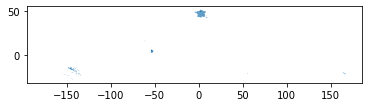

In [3]:
france_map.plot()

The map contains information about metropolitan France and overseas territories. We need to do a filter on metropolitan territories to have something plotable.

In [4]:
qgrid_widget = qgrid.show_grid(france_map, show_toolbar=True, grid_options={'maxVisibleRows':5})
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

We select only departments not starting with "Z"

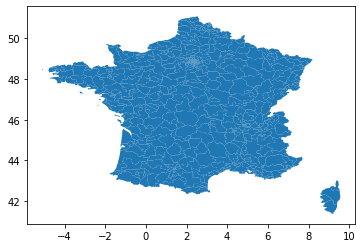

In [5]:
france_metro_map = france_map[[not i.startswith('Z') for i in france_map.code_dpt]]
france_metro_map.plot()

## Get the results of European election in France from data.gouv.fr

In [6]:
import pandas as pd
import qgrid

In [7]:
# Source https://www.data.gouv.fr/fr/datasets/elections-europeennes-2019-resultats/#_
url = 'https://www.data.gouv.fr/fr/datasets/r/91971751-2ba4-4c2c-90c6-5c18933a5523'
eu_elec = pd.read_excel(url)
eu_elec.to_csv('data/eu_elec_circ_2019.csv', index=False)

# In case the link is not more valid use the local file:
# eu_elec = pd.read_csv('data/eu_elec_circ_2019.csv')

In [8]:
qgrid_widget_2 = qgrid.show_grid(eu_elec, show_toolbar=True, grid_options={'maxVisibleRows':5,
                                                                           'forceFitColumns': False,
                                                           'defaultColumnWidth': 100})
qgrid_widget_2

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

## Filter Data

Let's remove note metropolitan departements:

In [9]:
eu_elec = eu_elec[[not i.startswith('Z') for i in eu_elec['Code du département']]]

There is too much column, we will remove unecessary column:

In [10]:
eu_elec.columns[18:25]

Index(['N°Liste', 'Libellé Abrégé Liste', 'Libellé Etendu Liste',
       'Nom Tête de Liste', 'Voix', '% Voix/Ins', '% Voix/Exp'],
      dtype='object')

In [11]:
start_list = 18
len_list = 7
end_list = len(eu_elec.columns)

list_name = eu_elec.loc[0]

In [12]:
list_number = eu_elec.iloc[0, range(start_list, end_list, len_list)]
list_short_name = eu_elec.iloc[0, range(start_list+1, end_list, len_list)]
list_name = eu_elec.iloc[0, range(start_list+2, end_list, len_list)]
list_head = eu_elec.iloc[0, range(start_list+3, end_list, len_list)]

Change the column name of number votes by the short name of the liste:

In [13]:
old_col_name = list(eu_elec.columns)

for i, j in enumerate(range(start_list+4, end_list, len_list)):
    old_col_name[j] = list_short_name[i] 

eu_elec.columns = old_col_name

In [14]:
col_to_drop = eu_elec.columns[ [i.startswith('Unnamed:') for i in eu_elec.columns ]]
col_to_drop = list(col_to_drop) + list(eu_elec.columns[[18, 19, 20, 21, 23, 24]])

In [15]:
eu_elec = eu_elec.drop(columns=col_to_drop)

## Get list with score more than 5%

In [16]:
exprime_tot = eu_elec['Exprimés'].sum()

In [17]:
col_list = eu_elec.columns[18:]

In [18]:
high_score = list(col_list[eu_elec.iloc[:,18:].sum()/exprime_tot*100 > 5])

In [19]:
high_score

['LA FRANCE INSOUMISE',
 'RENAISSANCE',
 "ENVIE D'EUROPE",
 'PRENEZ LE POUVOIR',
 'UNION DROITE-CENTRE',
 'EUROPE ÉCOLOGIE']

In [20]:
eu_elec_dpt = eu_elec.groupby(['Code du département']).sum()
eu_elec_dpt

,Code de la circonscription,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,...,RÉVOLUTIONNAIRE,ESPERANTO,ÉVOLUTION CITOYENNE,ALLIANCE JAUNE,UNION DROITE-CENTRE,EUROPE ÉCOLOGIE,PARTI ANIMALISTE,LES OUBLIES DE L'EUROPE,UDLEF,EUROPE AU SERVICE PEUPLES
Code du département,,,,,,,,,,,,,,,,,,,,,
01,15,417781,209845,251.59,207936,248.41,4674,5.60,11.27,4137,...,1,152,7,965,21179,27494,4075,462,8,273
02,15,371723,176251,236.65,195472,263.35,4970,6.73,12.75,4718,...,6,151,10,1212,13349,14555,4801,448,10,49
03,6,248389,113300,136.85,135089,163.15,4331,5.21,9.59,4793,...,0,108,1,853,14023,11403,2992,375,2,16
04,3,126239,56609,89.61,69630,110.39,1614,2.56,4.64,1701,...,0,81,16,461,4314,8750,1468,185,0,2
05,3,109697,49410,90.08,60287,109.92,1575,2.87,5.22,1211,...,0,66,8,308,4415,9239,1191,192,1,9
06,45,755808,379116,451.53,376692,448.47,6239,7.44,14.89,6254,...,48,251,39,1517,41657,43340,9957,425,69,767
07,6,249119,111338,134.06,137781,165.94,3717,4.47,8.09,3383,...,1,93,12,754,13525,18125,2414,373,3,6
08,6,191612,94083,147.20,97529,152.80,2252,3.54,6.91,2835,...,0,53,8,574,7528,7789,2667,242,6,49
09,3,117515,50772,86.34,66743,113.66,1935,3.29,5.79,1821,...,2,71,3,370,3273,7791,1301,243,0,2


In [21]:
main_list_num = len(high_score)
result_list = [[] for _ in range(main_list_num)]


for index, row in france_metro_map.iterrows():
    dpt = row.code_dpt
    for i in range(main_list_num):
        result_list[i].append(100*eu_elec_dpt.loc[dpt, high_score[i]]/eu_elec_dpt.loc[dpt, 'Exprimés'])

for i in range(main_list_num):
    france_metro_map[high_score[i]] = result_list[i]

/home/murail/miniconda3/envs/jupyter_course/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


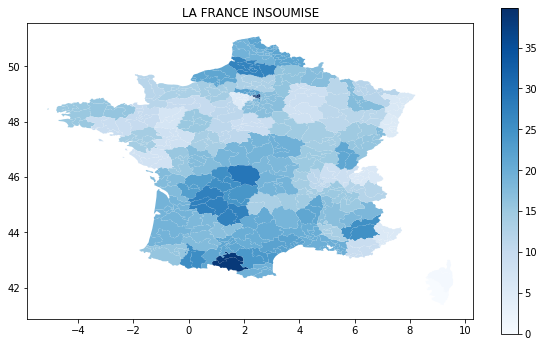

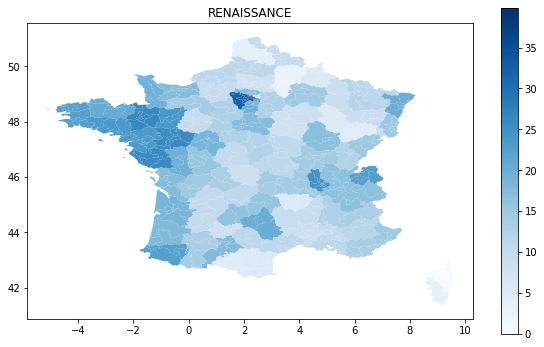

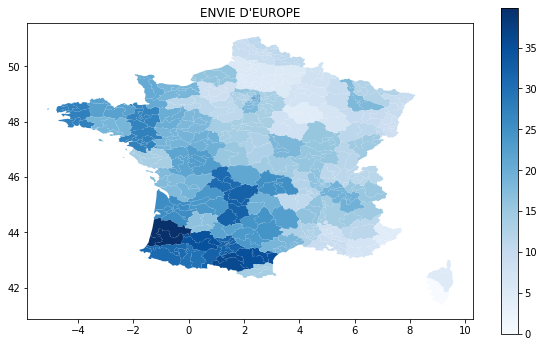

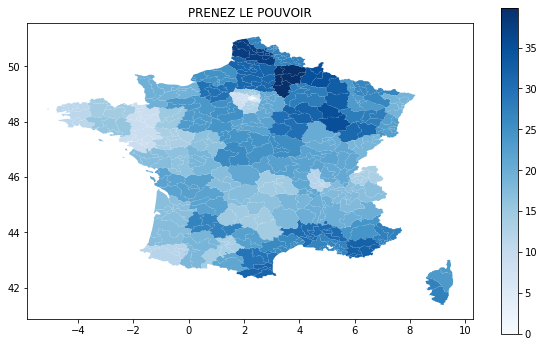

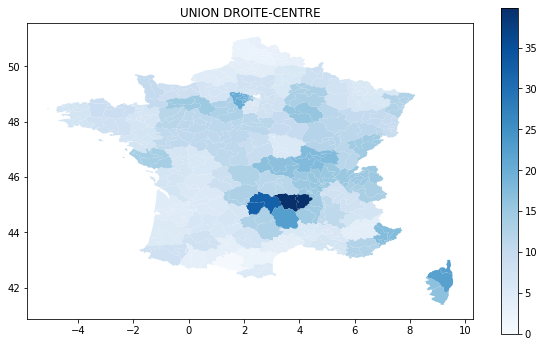

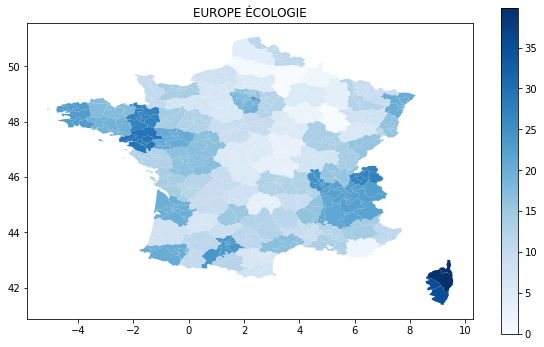

In [22]:
import matplotlib.pyplot as plt

flat_result = [j for sub in result_list for j in sub]

min_perc = 0
max_perc = max(flat_result)

for i, liste in enumerate(high_score):
    fig, ax = plt.subplots(1, figsize=(10, 6))
    france_metro_map.plot(column=liste, ax=ax, cmap='Blues')
    plt.title(liste)
    sm = plt.cm.ScalarMappable(cmap='Blues',
                               norm=plt.Normalize(vmin=min_perc, vmax=max_perc))

    # empty array for the data range

    sm._A = []

    # add the colorbar to the figure

    cbar = fig.colorbar(sm)
    #plt.colorbar()